In [15]:
import keras
from keras.layers import Input, Dense, Dropout
import tensorflow as tf

In [16]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [17]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


9


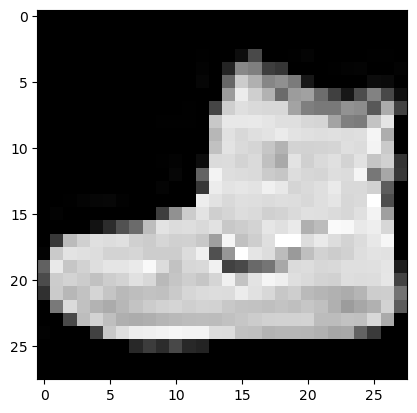

In [18]:
# view the first image
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap='gray')
print(y_train[0])

In [19]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [20]:
gpus = tf.config.experimental.list_physical_devices('GPU')
print(gpus)
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)


[]


In [21]:
# mormalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# since MLP flatten the input, we need to flatten the input
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)



In [38]:
network = keras.models.Sequential()
network.add(keras.layers.Dense(512, activation='relu', input_shape=(28*28,)))
network.add(keras.layers.Dense(512, activation='relu'))
network.add(Dropout(0.2))
network.add(keras.layers.Dense(128, activation='relu'))
network.add(Dropout(0.2))
network.add(keras.layers.Dense(512, activation='relu'))
network.add(keras.layers.Dense(10, activation='softmax'))

network.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

network.fit(x_train, y_train, epochs=20, batch_size=128,)

Epoch 1/20
469/469 [==============================] - 4s 8ms/step - loss: 0.5329 - accuracy: 0.8077
Epoch 2/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3768 - accuracy: 0.8638
Epoch 3/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3393 - accuracy: 0.8760
Epoch 4/20
469/469 [==============================] - 3s 7ms/step - loss: 0.3130 - accuracy: 0.8847
Epoch 5/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2961 - accuracy: 0.8911
Epoch 6/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2793 - accuracy: 0.8965
Epoch 7/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2725 - accuracy: 0.8988
Epoch 8/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2593 - accuracy: 0.9034
Epoch 9/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2507 - accuracy: 0.9065
Epoch 10/20
469/469 [==============================] - 3s 7ms/step - loss: 0.2395 - accuracy: 0.9100

{'loss': [0.53292316198349, 0.37675461173057556, 0.3392738401889801, 0.31296929717063904, 0.29611217975616455, 0.27929654717445374, 0.27249088883399963, 0.2593202590942383, 0.25074219703674316, 0.23946473002433777, 0.22963565587997437, 0.22518783807754517, 0.2185746282339096, 0.21149609982967377, 0.2035059630870819, 0.19947710633277893, 0.19679787755012512, 0.18633471429347992, 0.17943862080574036, 0.17738743126392365], 'accuracy': [0.8076666593551636, 0.8637999892234802, 0.8760499954223633, 0.8847000002861023, 0.8910833597183228, 0.8965333104133606, 0.8988000154495239, 0.9033833146095276, 0.9065499901771545, 0.9099666476249695, 0.9131500124931335, 0.9153833389282227, 0.9179333448410034, 0.9208333492279053, 0.9224333167076111, 0.9248999953269958, 0.9251000285148621, 0.9285500049591064, 0.9320166707038879, 0.9315500259399414]}


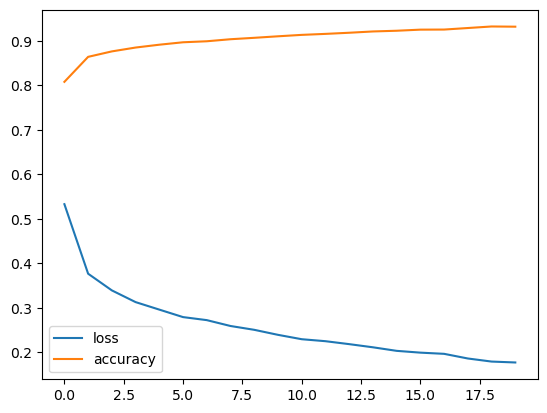

In [39]:
# plot loss and accuracy
history = network.history.history
print(history)
plt.plot(history['loss'], label='loss')
plt.plot(history['accuracy'], label='accuracy')
plt.legend()

In [40]:
# evaluate the model
test_loss, test_acc = network.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)


313/313 [==============================] - 0s 1ms/step - loss: 0.3373 - accuracy: 0.8971
Test accuracy: 0.8970999717712402


In [41]:
# see what images are misclassified
import numpy as np
predictions = network.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
misclassified = np.where(predicted_classes != y_test)[0]
print(misclassified)

    

313/313 [==============================] - 0s 1ms/step
[  12   17   23 ... 9961 9977 9991]


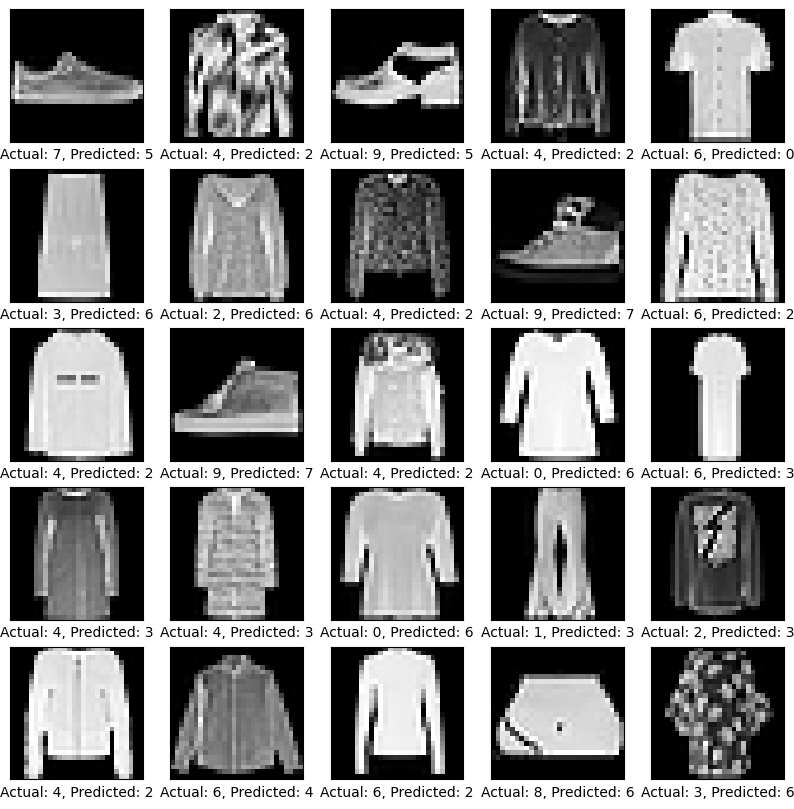

In [42]:
# plot the first 25 misclassified images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[misclassified[i]].reshape(28,28), cmap='gray')
    plt.xlabel(f'Actual: {y_test[misclassified[i]]}, Predicted: {predicted_classes[misclassified[i]]}')

<Axes: >

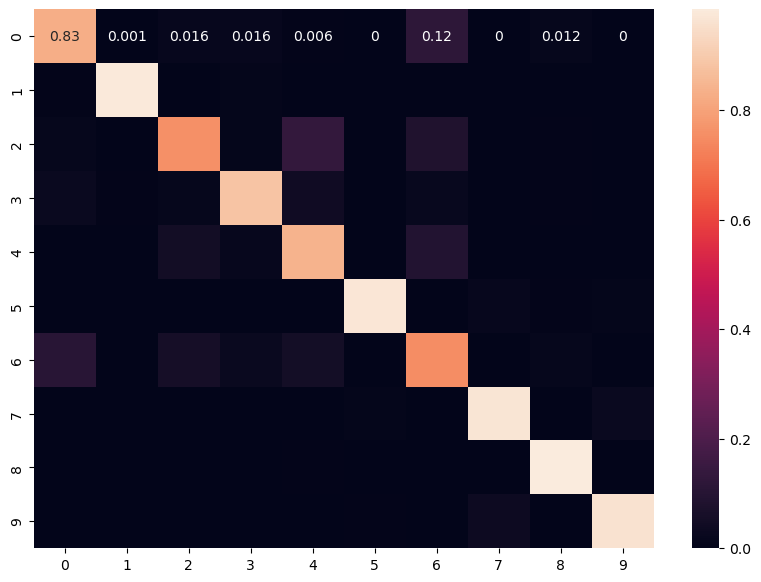

In [37]:
# Confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
cm = confusion_matrix(y_test, predicted_classes)
cm = cm / cm.sum(axis=1)
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                  columns = [i for i in "0123456789"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)


In [6]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
y_train = y_train.reshape(y_train.shape[0], 1)
y_test = y_test.reshape(y_test.shape[0], 1)


In [7]:
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD
from keras.regularizers import L1, L2
from keras.preprocessing.image import ImageDataGenerator

# ... (Your data loading and preprocessing code)

# Define a wider range of hidden layer sizes to explore
hidden_layer_sizes = [512, 1024]

# Create a loop to try different architectures and hyperparameters
for hidden_size in hidden_layer_sizes:
    # Create a new MLP model with the current hidden size
    network = keras.models.Sequential()
    network.add(keras.layers.Flatten(input_shape=(28, 28, 1))) 
    network.add(keras.layers.Dense(hidden_size, activation='relu', input_shape=(28*28,)))
    network.add(Dropout(0.2))  # Add dropout for regularization
    network.add(keras.layers.Dense(hidden_size, activation='relu'))
    network.add(Dropout(0.2))
    network.add(keras.layers.Dense(10, activation='softmax'))

    #可以选择不同的优化器例如SGD
    # opt = SGD(learning_rate=0.01, momentum=0.9)
    
    # Or L1/L2 regularization with Adam
    network.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy',
                    metrics=['accuracy']
                    )

    # Use data augmentation with ImageDataGenerator
    datagen = ImageDataGenerator(  
        rotation_range=10,  # Rotate images up to 10 degrees  
        width_shift_range=0.1,  # Shift images horizontally up to 10% of the width  
        height_shift_range=0.1,  # Shift images vertically up to 10% of the height  
        zoom_range=0.1,  # Zoom in on images up to 10%  
        fill_mode='nearest'  # Fill in missing pixels with the nearest filled value  
    )
    datagen.fit(x_train)

    # print the shape of the data
    print(x_train.shape)
    print(y_train.shape)
    print(x_test.shape)
    print(y_test.shape)

    # Train the model with early stopping
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3)
    network.fit(datagen.flow(x_train, y_train, batch_size=128),
                epochs=20,
                validation_data=(x_test, y_test),
                callbacks=[early_stopping])

    # Evaluate and analyze misclassified images
    test_loss, test_acc = network.evaluate(x_test, y_test)
    print(f'Test accuracy with hidden size {hidden_size}: {test_acc}')
    # ... (Analyze misclassified images as before)


(60000, 28, 28, 1)
(60000, 1)
(10000, 28, 28, 1)
(10000, 1)
Epoch 1/20
469/469 [==============================] - 13s 26ms/step - loss: 4.8916 - accuracy: 0.0776 - val_loss: 0.9960 - val_accuracy: 0.1021
Epoch 2/20
469/469 [==============================] - 12s 26ms/step - loss: 1.3007 - accuracy: 0.0703 - val_loss: 0.9147 - val_accuracy: 0.0866
Epoch 3/20
469/469 [==============================] - 13s 27ms/step - loss: 1.1391 - accuracy: 0.0752 - val_loss: 0.8470 - val_accuracy: 0.1041
Epoch 4/20
469/469 [==============================] - 12s 26ms/step - loss: 1.0127 - accuracy: 0.0798 - val_loss: 0.7768 - val_accuracy: 0.1046
Epoch 5/20
469/469 [==============================] - 13s 27ms/step - loss: 0.9316 - accuracy: 0.0962 - val_loss: 0.7111 - val_accuracy: 0.1402
Epoch 6/20
469/469 [==============================] - 12s 26ms/step - loss: 0.9080 - accuracy: 0.1088 - val_loss: 0.6908 - val_accuracy: 0.1151
Epoch 7/20
469/469 [==============================] - 13s 27ms/step - loss: 